In [2]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('covid_19_data.csv')

In [4]:
df.head(10)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [5]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)#change in df

In [6]:
df.head(10)

,ObservationDate,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0
5,01/22/2020,Guangdong,Mainland China,26.0,0.0,0.0
6,01/22/2020,Guangxi,Mainland China,2.0,0.0,0.0
7,01/22/2020,Guizhou,Mainland China,1.0,0.0,0.0
8,01/22/2020,Hainan,Mainland China,4.0,0.0,0.0
9,01/22/2020,Hebei,Mainland China,1.0,0.0,0.0


In [7]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [8]:
df.head()

,Date,Province,Country,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,0.0,0.0,0.0


In [9]:
df['Date' ] = pd.to_datetime(df['Date'])

In [10]:
df.head()


,Date,Province,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0


In [11]:
df.describe()

,Confirmed,Deaths,Recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   Province   228329 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  float64       
 4   Deaths     306429 non-null  float64       
 5   Recovered  306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


In [16]:
df.fillna('NA')

,Date,Province,Country,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...,...
306424,2021-05-29,Zaporizhia Oblast,Ukraine,102641.0,2335.0,95289.0
306425,2021-05-29,Zeeland,Netherlands,29147.0,245.0,0.0
306426,2021-05-29,Zhejiang,Mainland China,1364.0,1.0,1324.0
306427,2021-05-29,Zhytomyr Oblast,Ukraine,87550.0,1738.0,83790.0


In [17]:
df2 = df.groupby('Country')[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [18]:
df2

,Country,Confirmed,Deaths,Recovered
0,Azerbaijan,1.0,0.0,0.0
1,"('St. Martin',)",2.0,0.0,0.0
2,Afghanistan,17026442.0,669075.0,13464399.0
3,Albania,19768869.0,375955.0,13945256.0
4,Algeria,27684358.0,834464.0,18959299.0
...,...,...,...,...
224,West Bank and Gaza,41819444.0,440378.0,37003116.0
225,Yemen,962066.0,237613.0,506523.0
226,Zambia,13493953.0,205990.0,12625626.0
227,Zimbabwe,6484581.0,237234.0,5594887.0


In [19]:
df2 = df.groupby(['Country','Date'])[['Country','Confirmed','Deaths','Recovered']].sum().reset_index()

In [20]:
df2

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,"('St. Martin',)",2020-03-10,2.0,0.0,0.0
2,Afghanistan,2020-02-24,1.0,0.0,0.0
3,Afghanistan,2020-02-25,1.0,0.0,0.0
4,Afghanistan,2020-02-26,1.0,0.0,0.0
...,...,...,...,...,...
87276,occupied Palestinian territory,2020-03-12,0.0,0.0,0.0
87277,occupied Palestinian territory,2020-03-14,0.0,0.0,0.0
87278,occupied Palestinian territory,2020-03-15,0.0,0.0,0.0
87279,occupied Palestinian territory,2020-03-16,0.0,0.0,0.0


In [21]:
df3 = df2[df2['Confirmed']>100]

In [22]:
df3

,Country,Date,Confirmed,Deaths,Recovered
35,Afghanistan,2020-03-28,107.0,4.0,2.0
36,Afghanistan,2020-03-29,118.0,4.0,2.0
37,Afghanistan,2020-03-30,146.0,4.0,2.0
38,Afghanistan,2020-03-31,175.0,4.0,5.0
39,Afghanistan,2020-04-01,197.0,4.0,5.0
...,...,...,...,...,...
87269,Zimbabwe,2021-05-25,38706.0,1587.0,36517.0
87270,Zimbabwe,2021-05-26,38819.0,1589.0,36531.0
87271,Zimbabwe,2021-05-27,38854.0,1592.0,36541.0
87272,Zimbabwe,2021-05-28,38918.0,1592.0,36563.0


In [23]:
df3.head(30)

,Country,Date,Confirmed,Deaths,Recovered
35,Afghanistan,2020-03-28,107.0,4.0,2.0
36,Afghanistan,2020-03-29,118.0,4.0,2.0
37,Afghanistan,2020-03-30,146.0,4.0,2.0
38,Afghanistan,2020-03-31,175.0,4.0,5.0
39,Afghanistan,2020-04-01,197.0,4.0,5.0
40,Afghanistan,2020-04-02,240.0,4.0,10.0
41,Afghanistan,2020-04-03,275.0,8.0,10.0
42,Afghanistan,2020-04-04,300.0,10.0,10.0
43,Afghanistan,2020-04-05,338.0,12.0,15.0
44,Afghanistan,2020-04-06,368.0,15.0,18.0


In [24]:
countries = df3['Country'].unique()
len(countries)

186

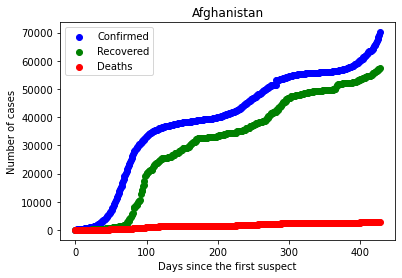

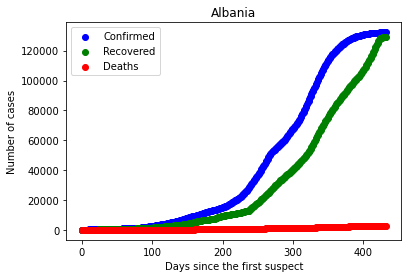

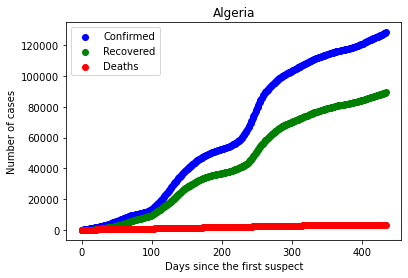

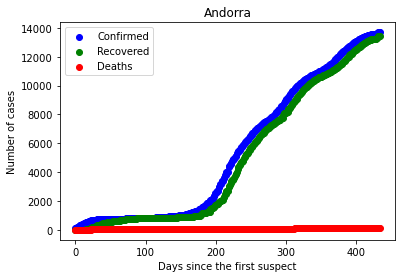

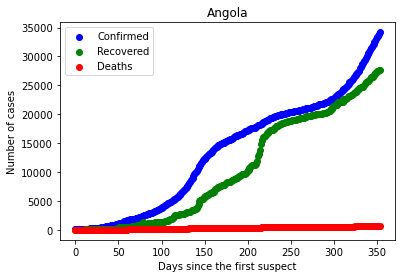

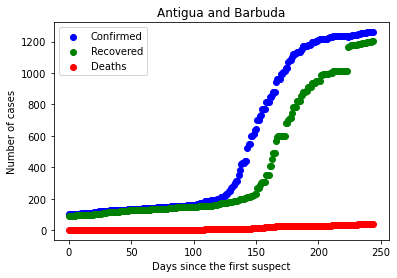

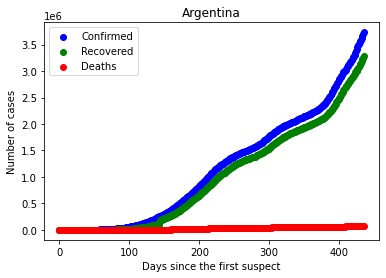

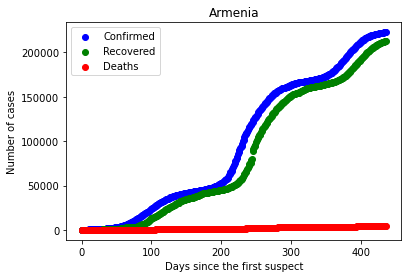

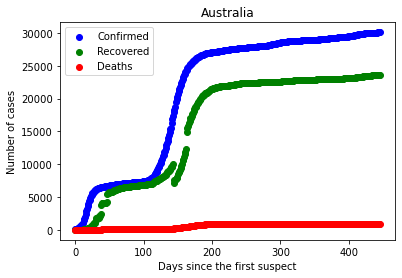

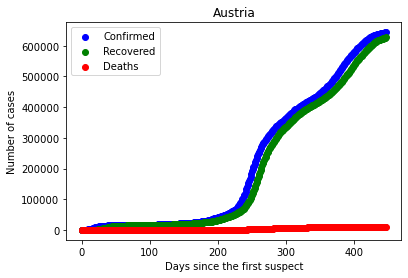

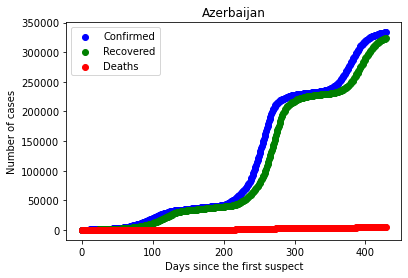

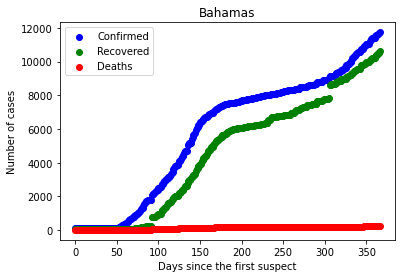

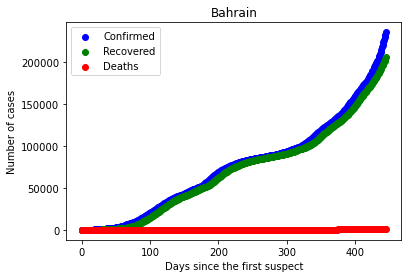

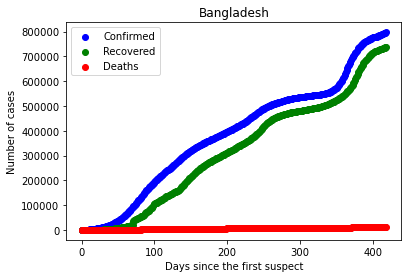

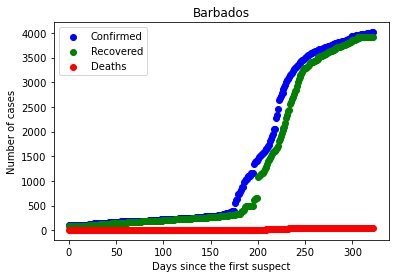

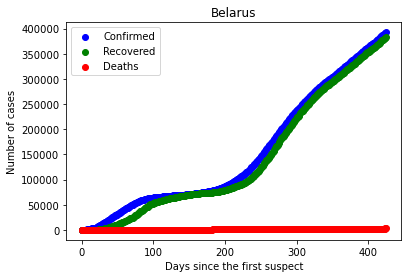

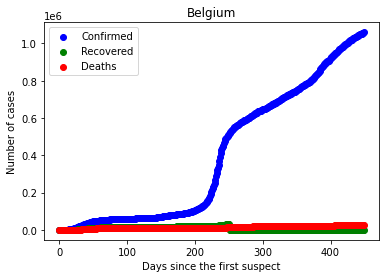

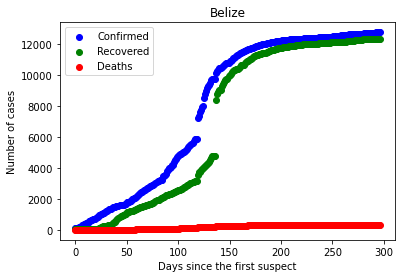

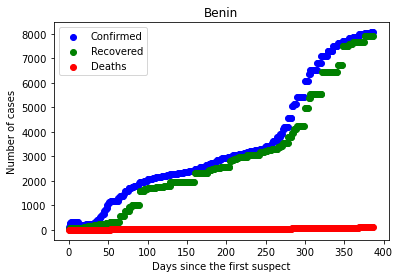

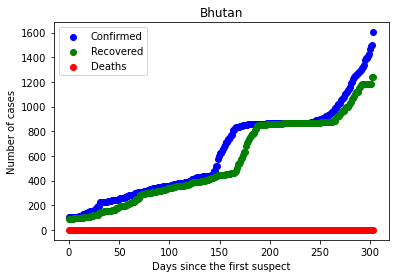

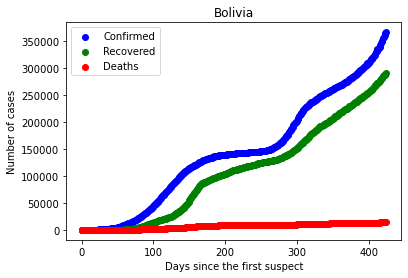

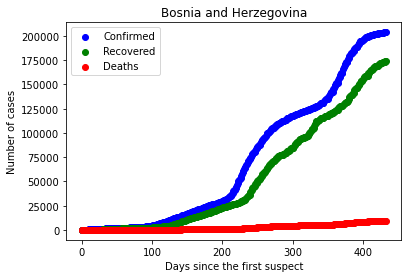

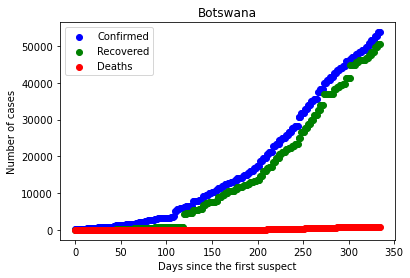

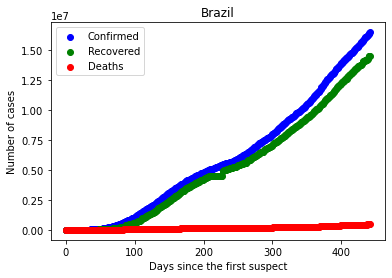

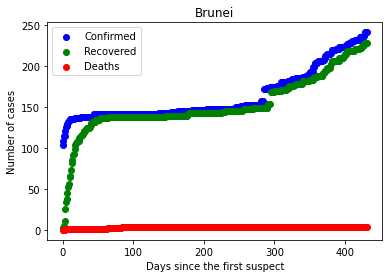

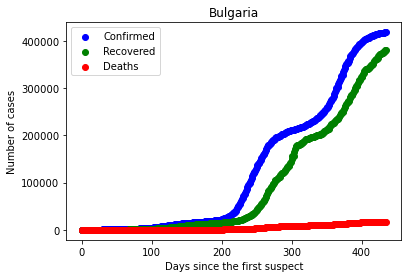

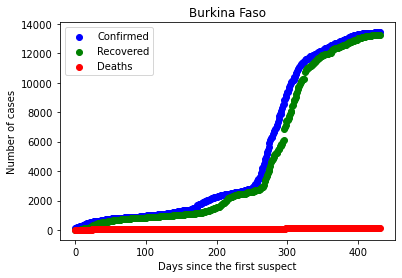

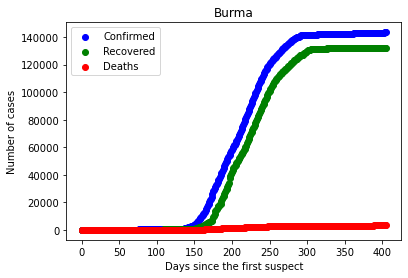

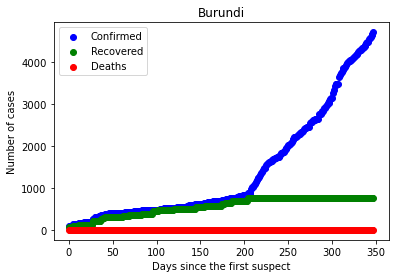

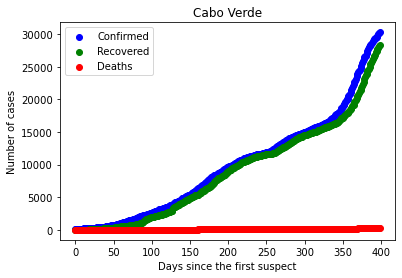

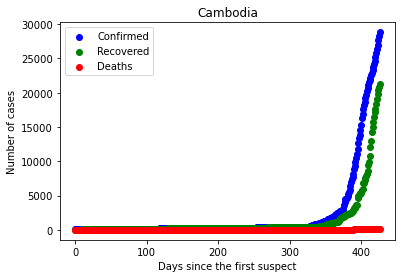

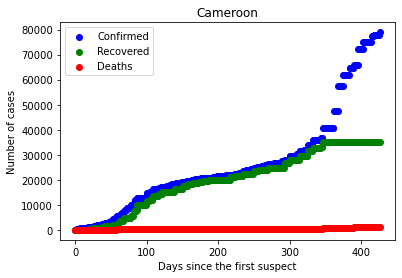

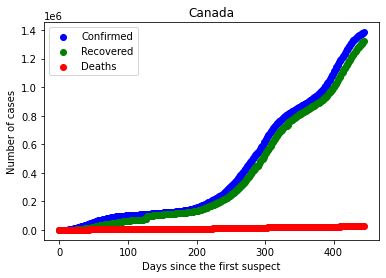

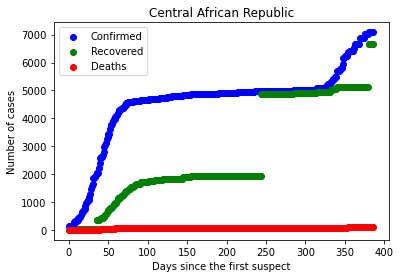

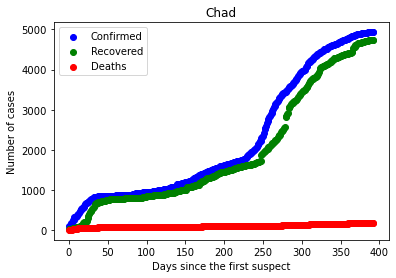

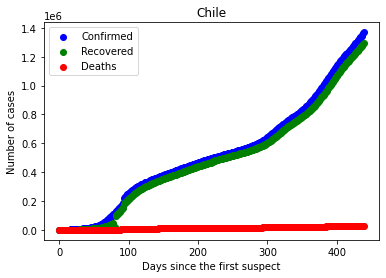

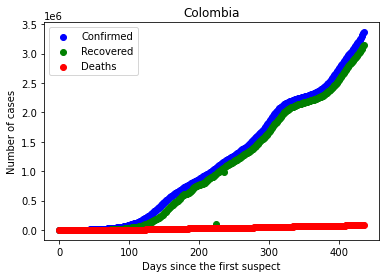

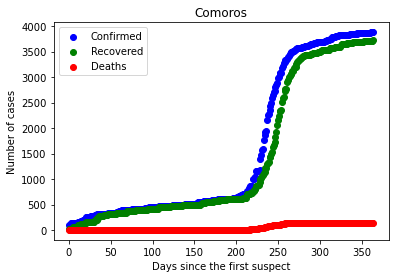

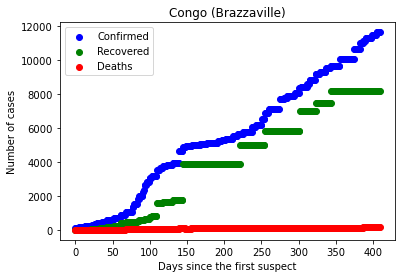

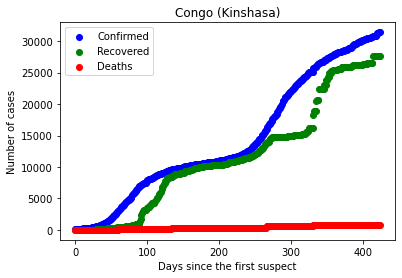

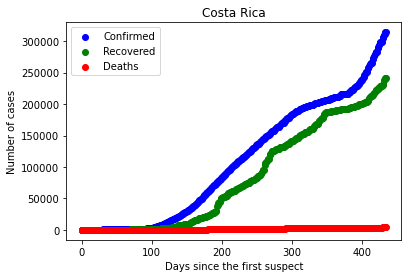

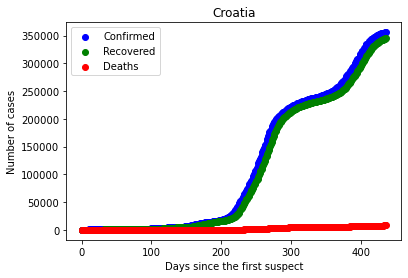

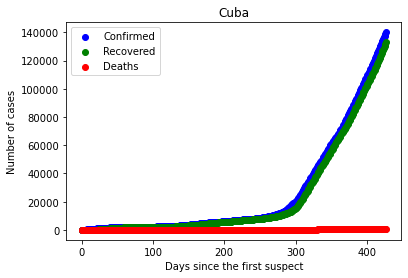

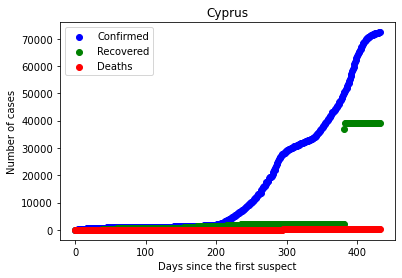

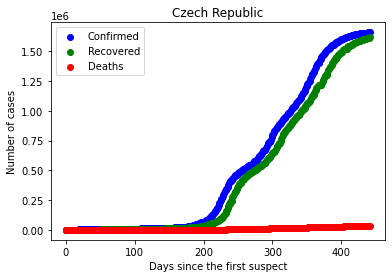

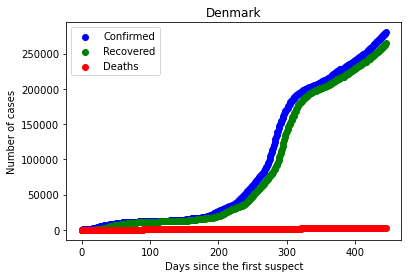

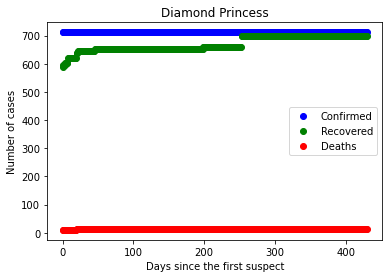

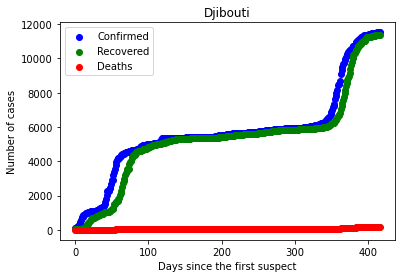

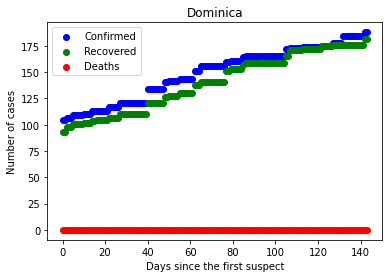

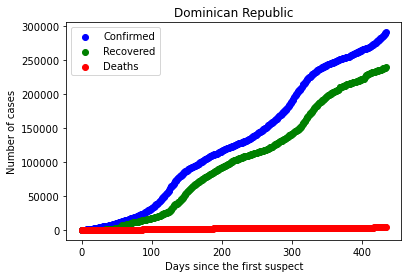

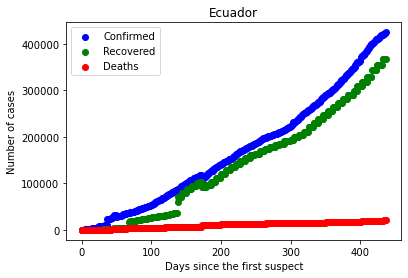

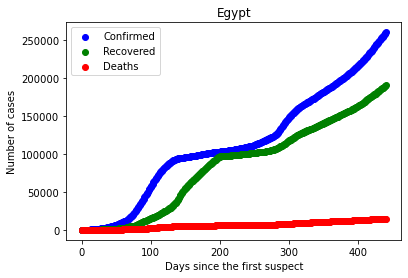

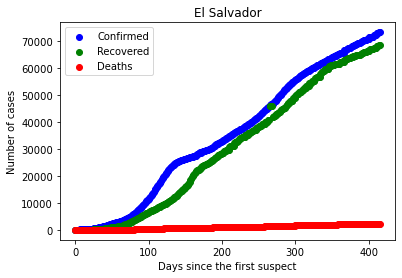

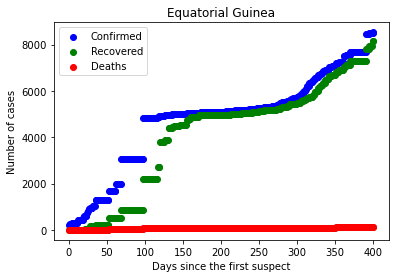

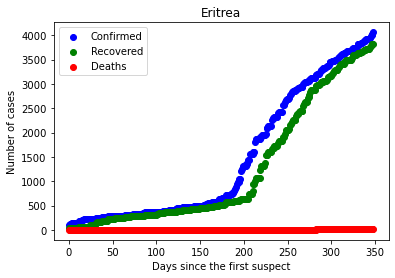

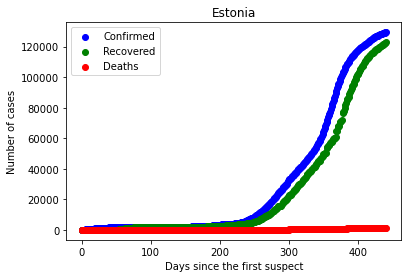

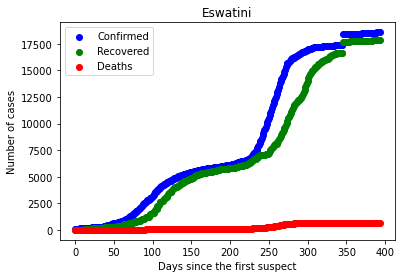

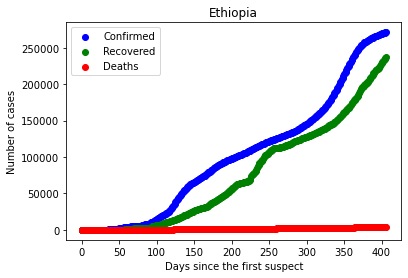

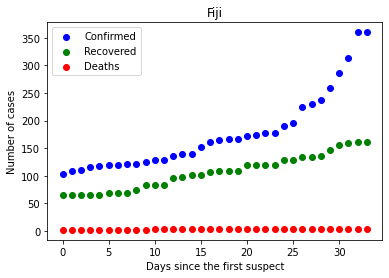

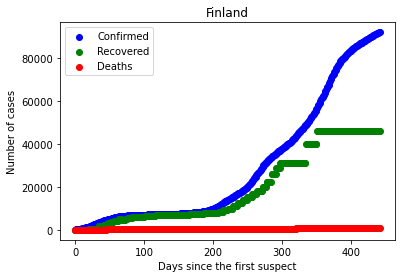

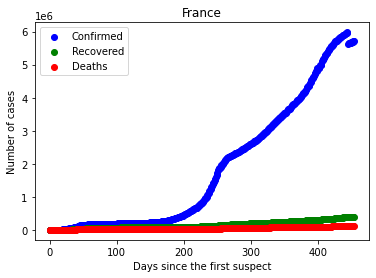

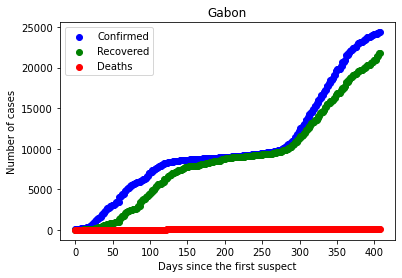

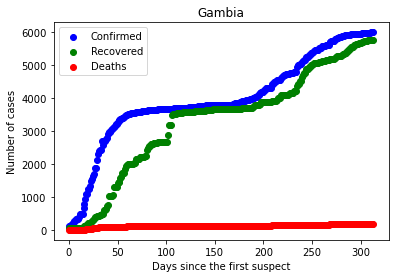

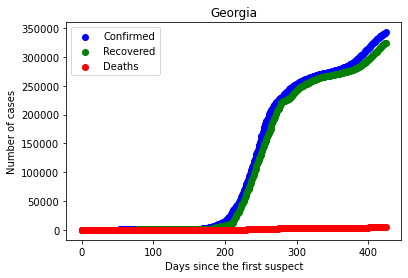

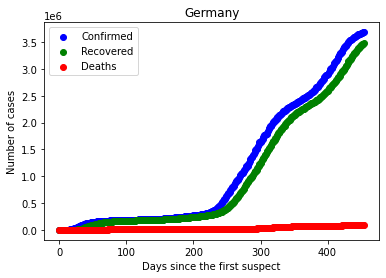

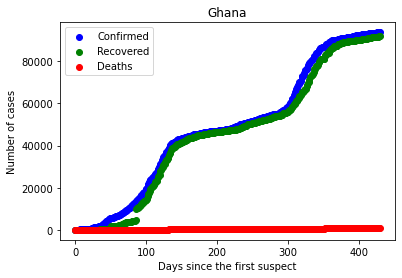

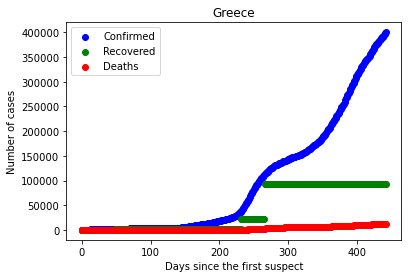

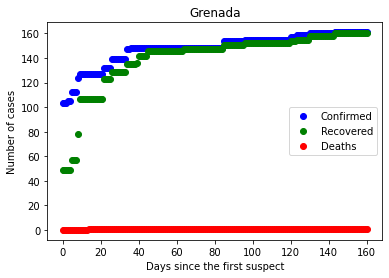

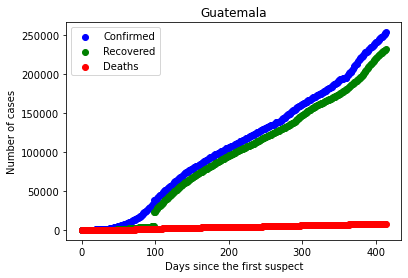

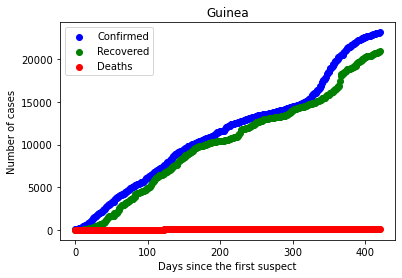

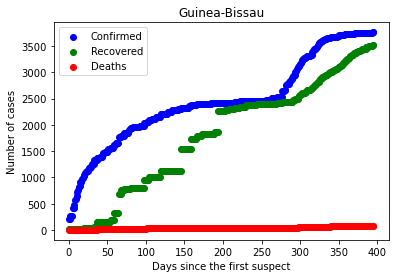

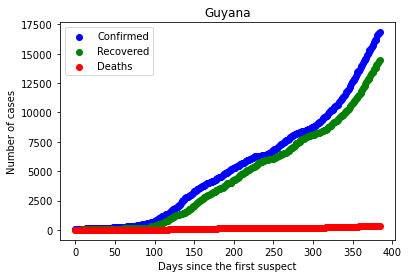

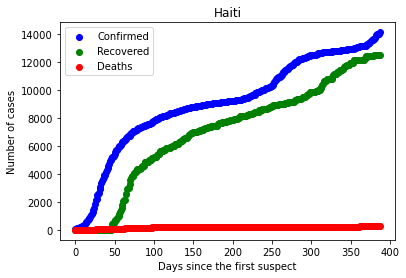

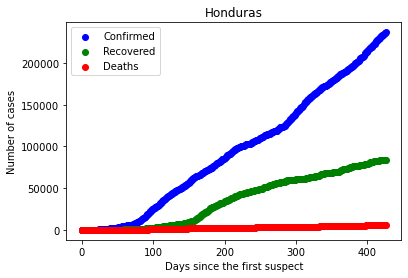

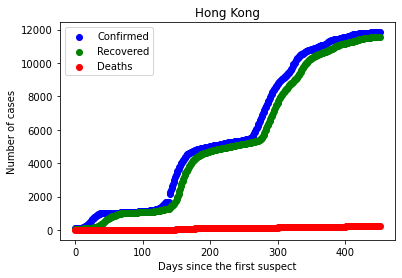

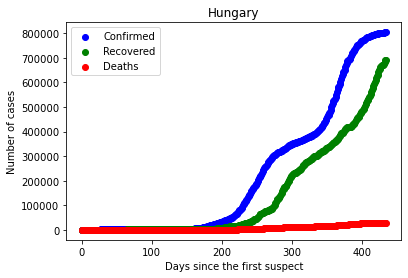

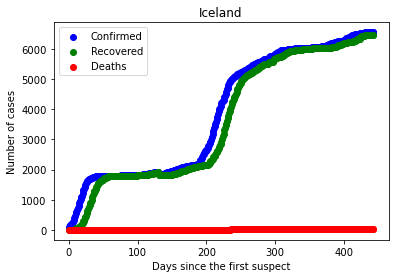

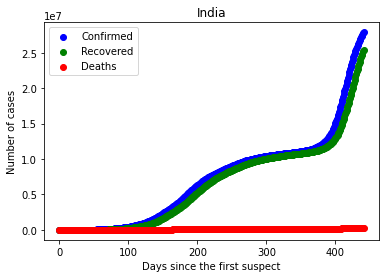

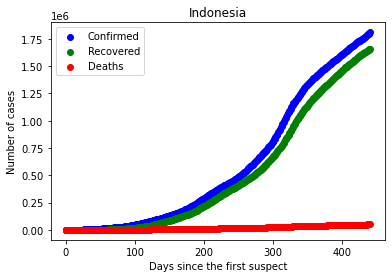

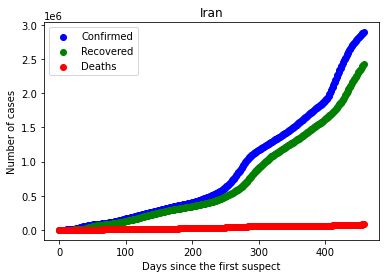

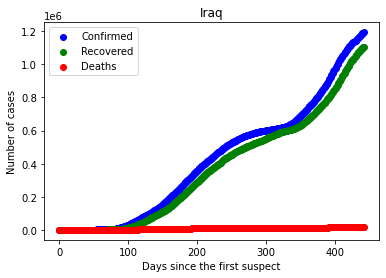

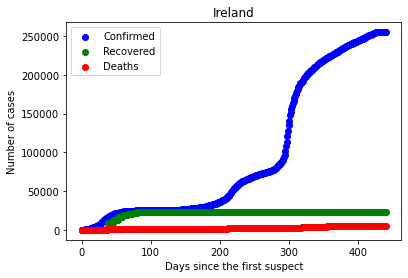

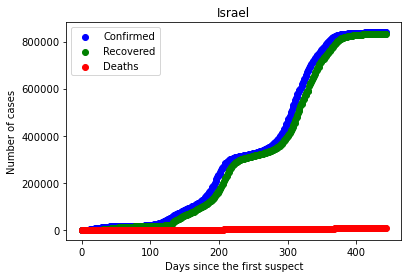

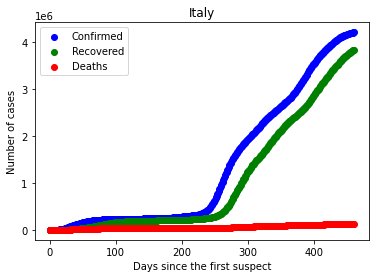

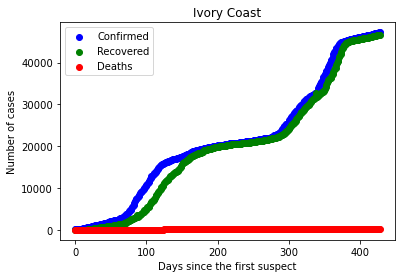

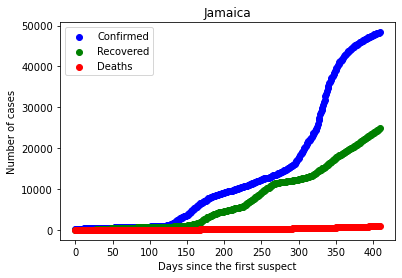

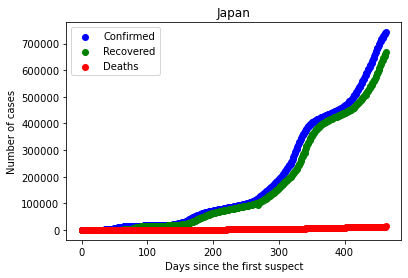

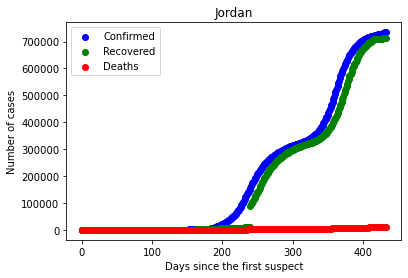

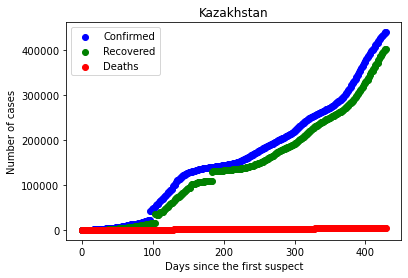

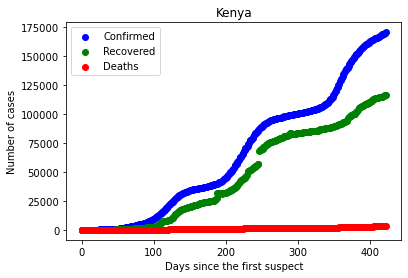

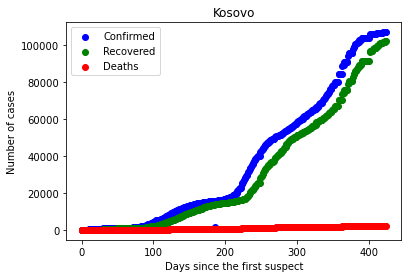

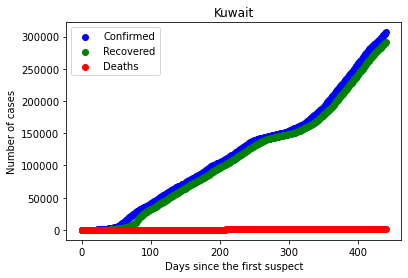

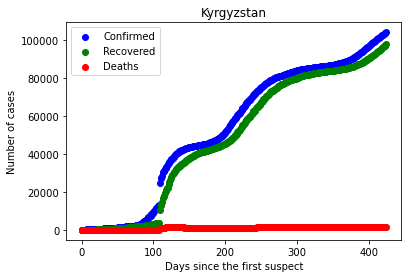

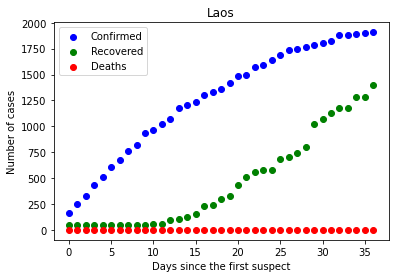

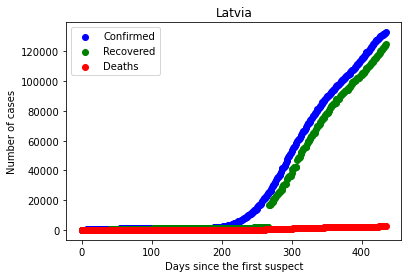

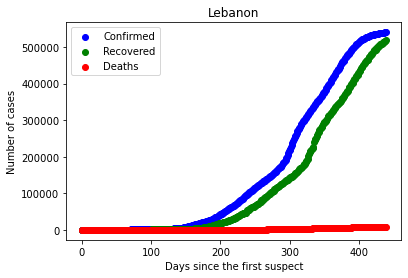

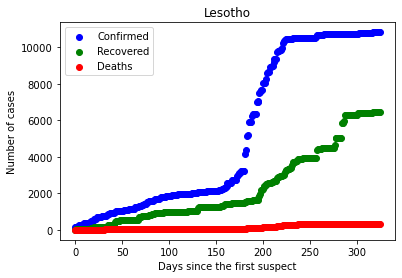

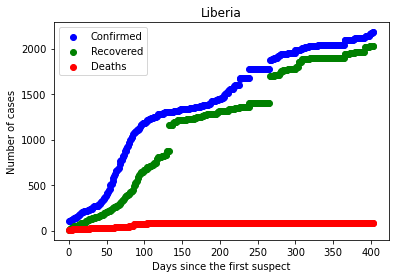

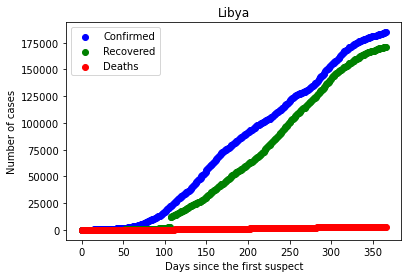

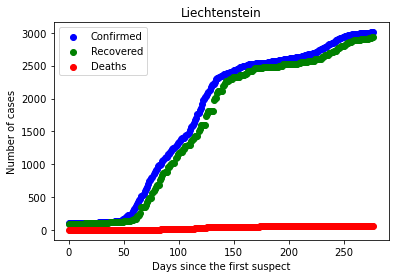

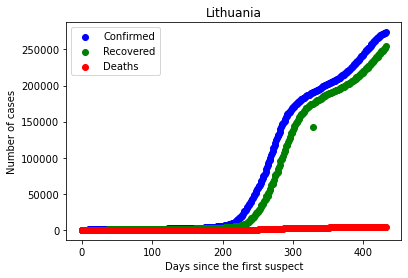

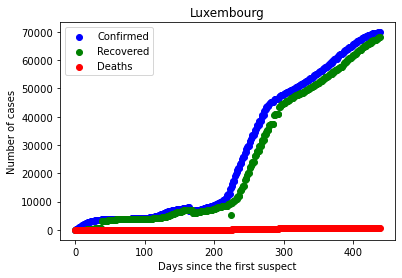

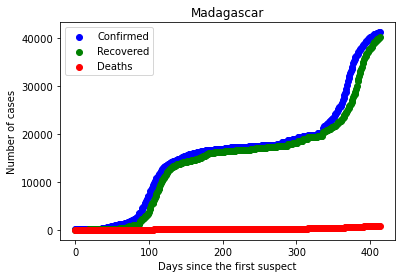

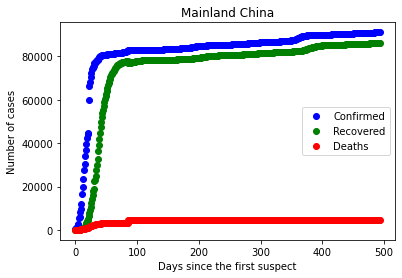

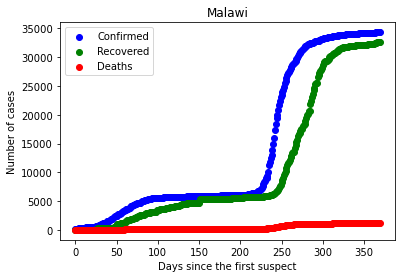

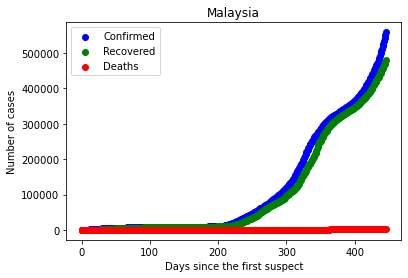

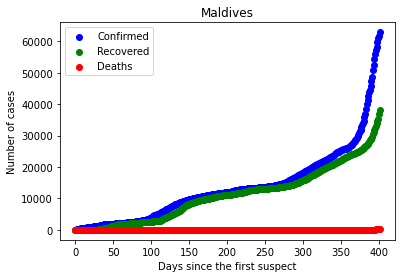

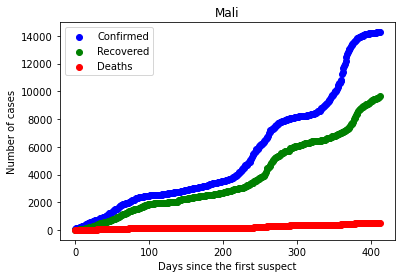

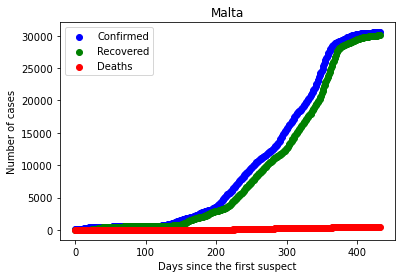

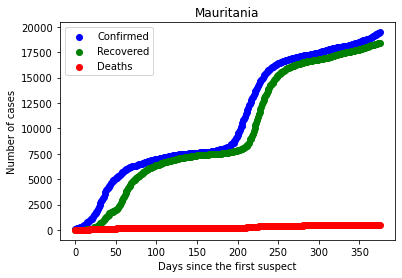

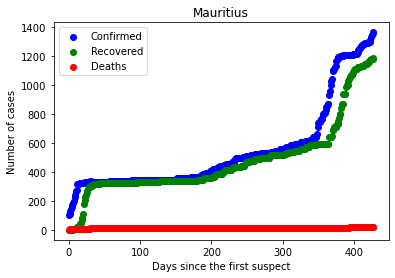

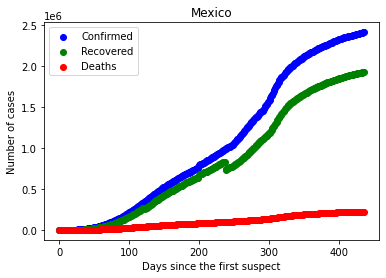

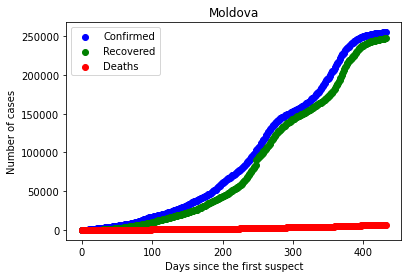

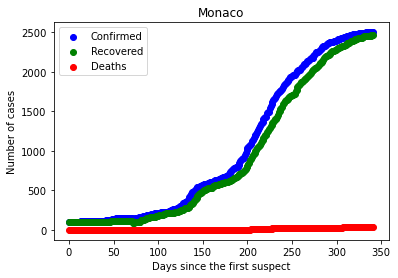

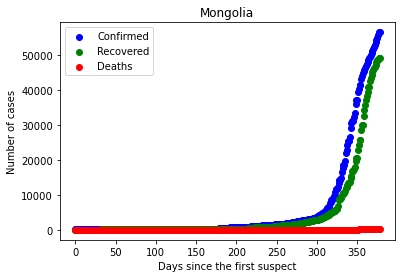

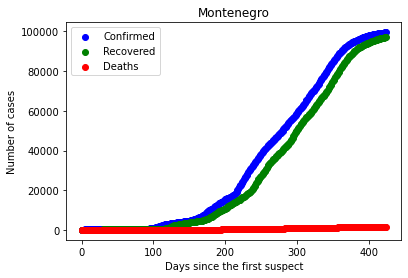

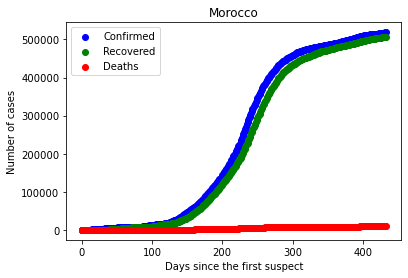

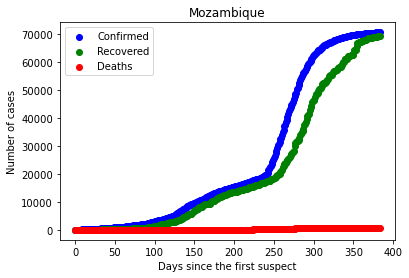

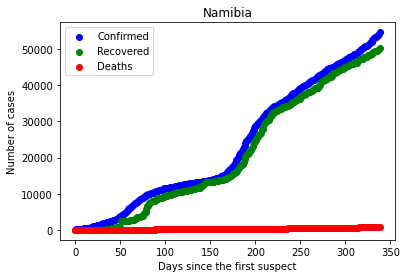

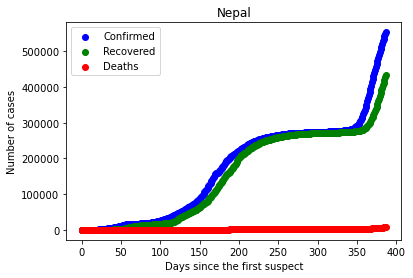

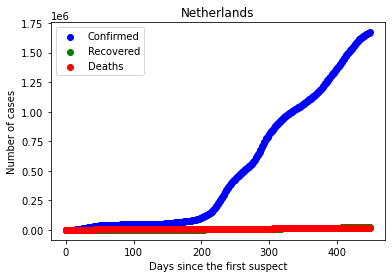

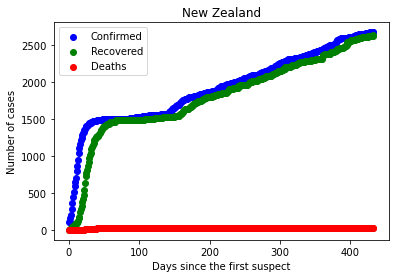

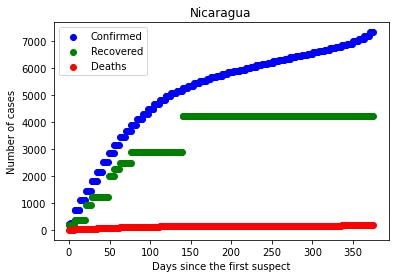

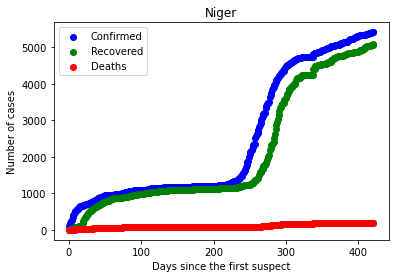

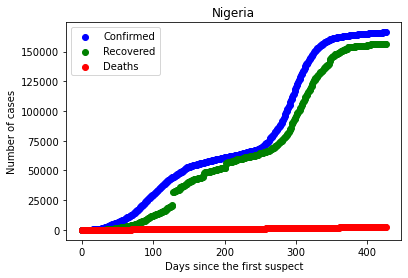

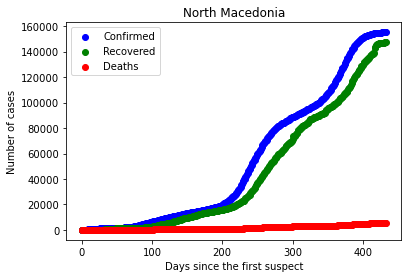

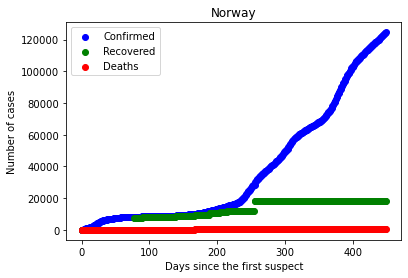

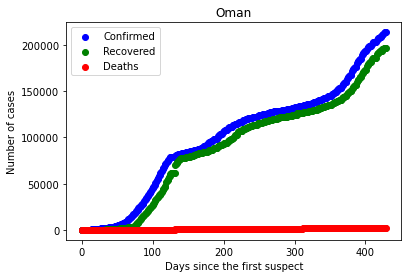

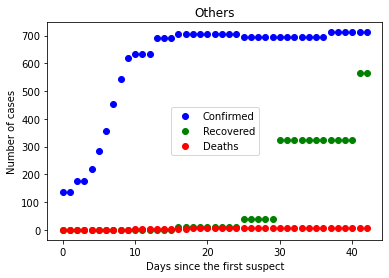

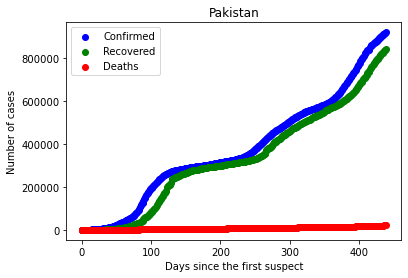

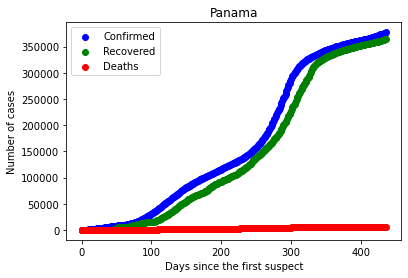

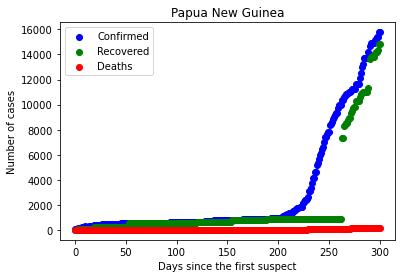

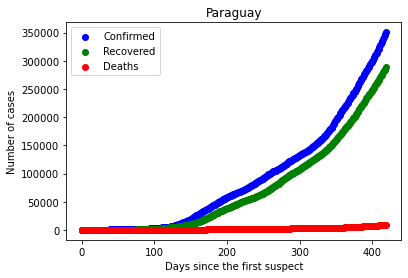

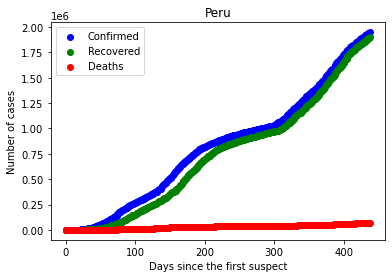

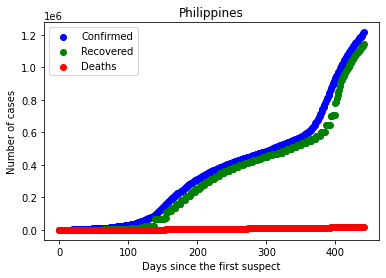

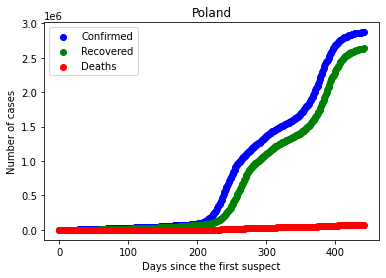

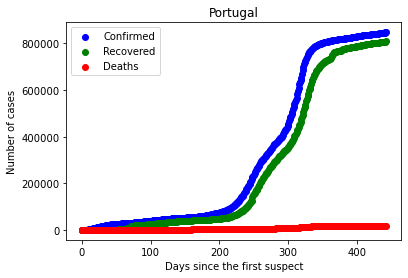

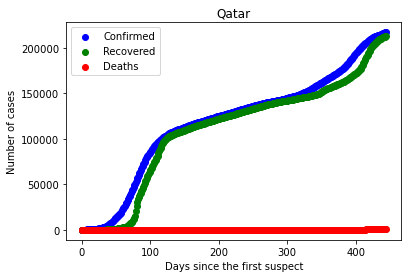

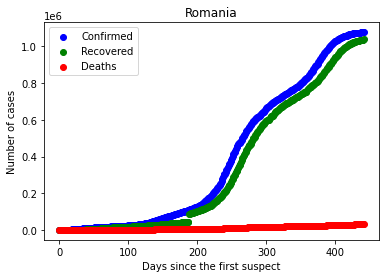

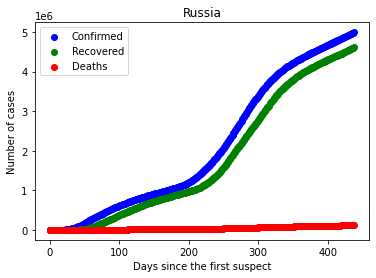

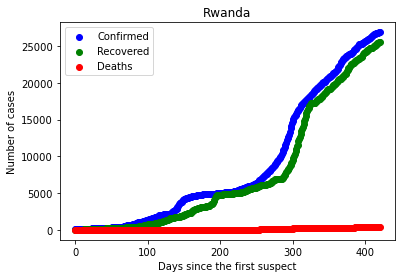

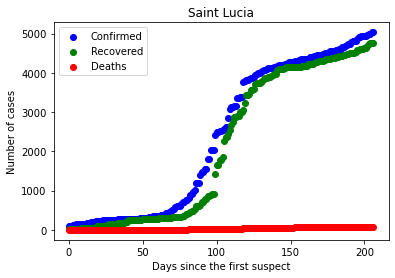

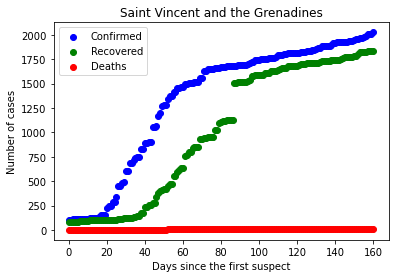

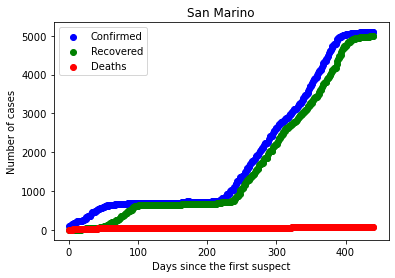

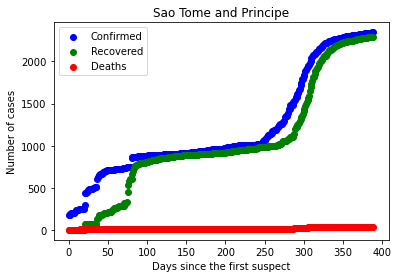

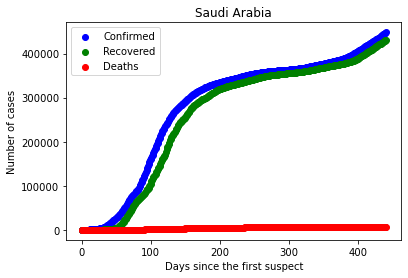

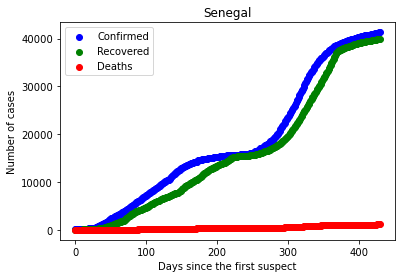

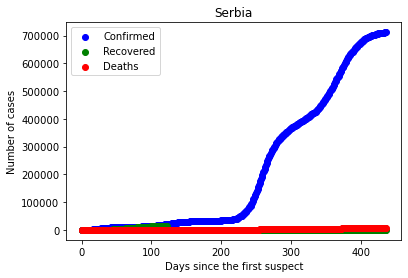

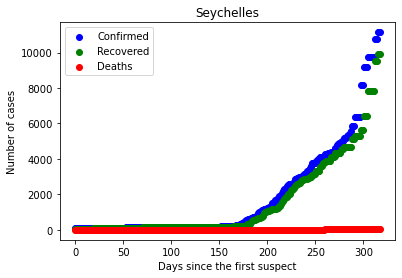

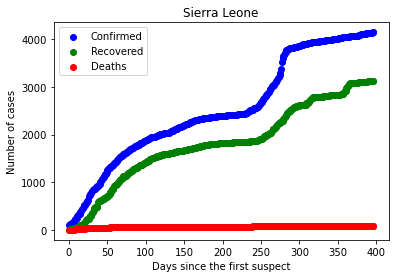

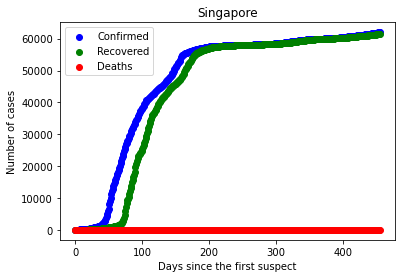

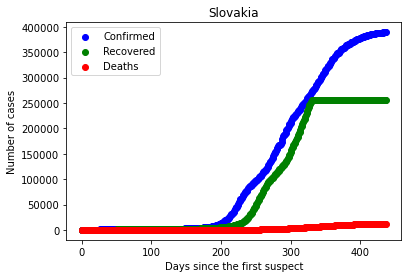

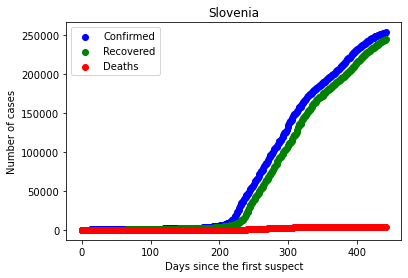

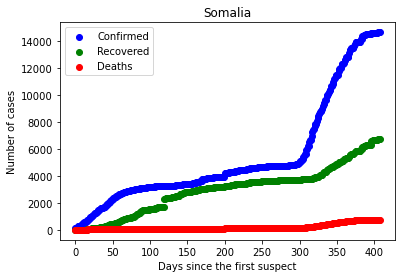

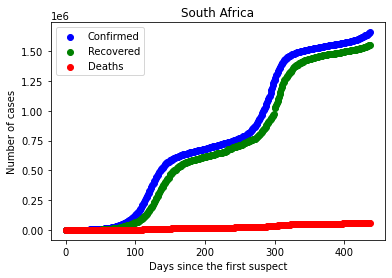

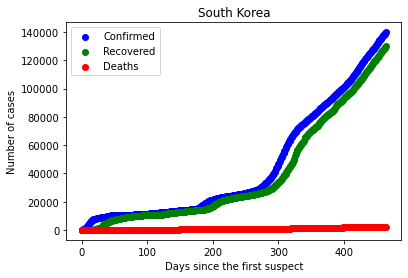

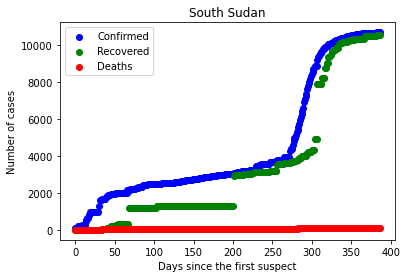

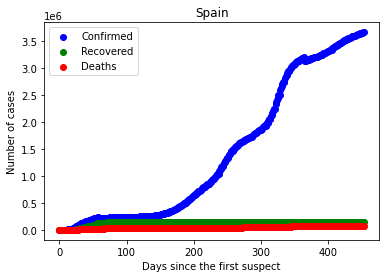

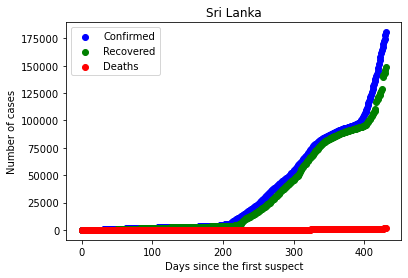

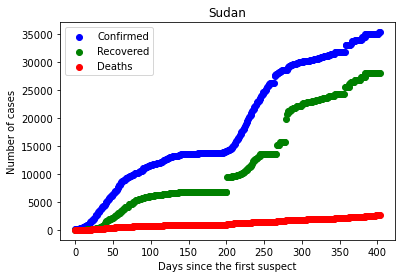

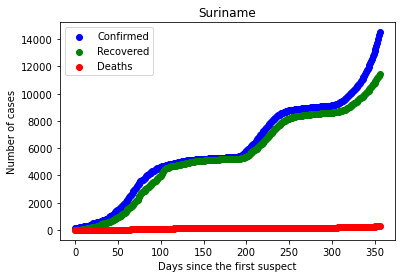

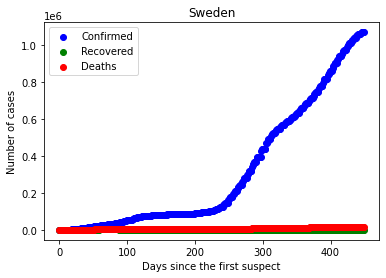

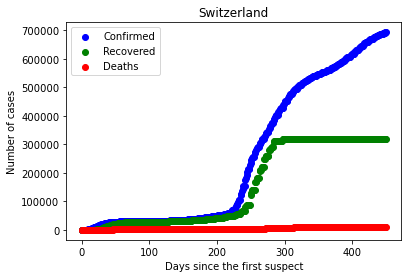

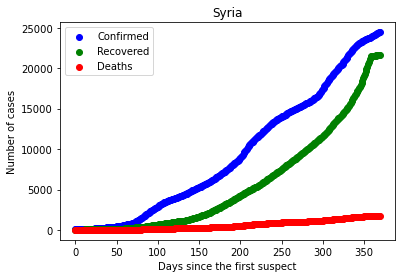

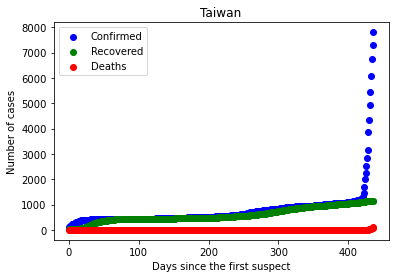

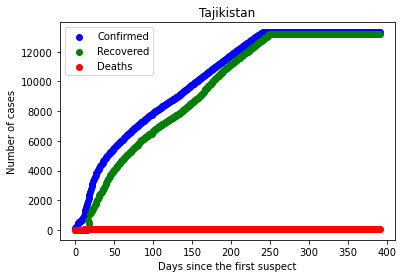

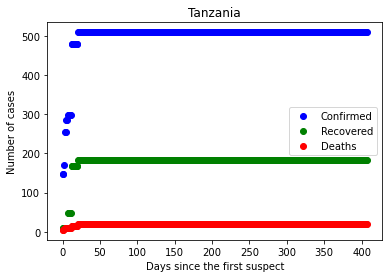

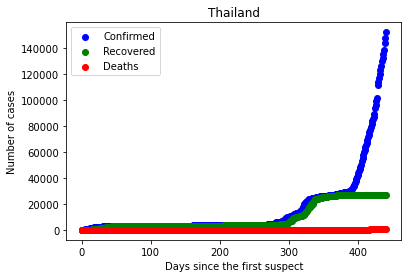

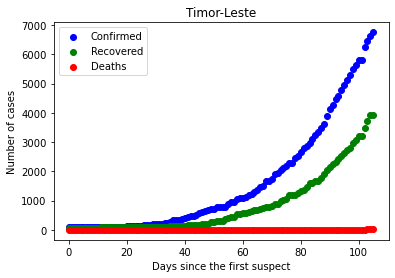

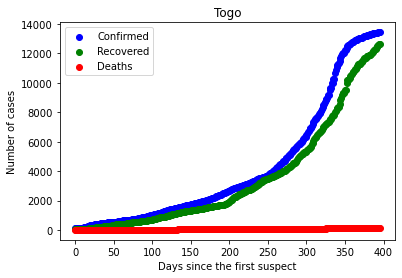

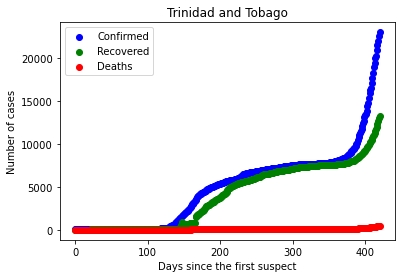

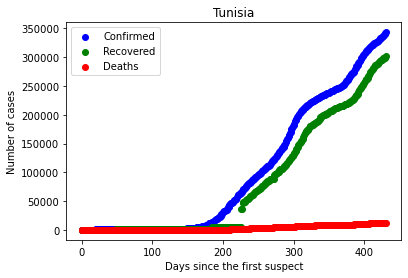

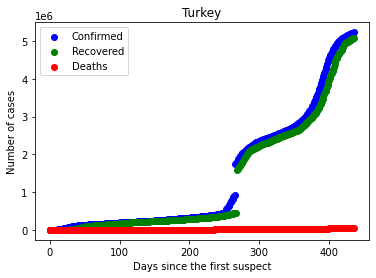

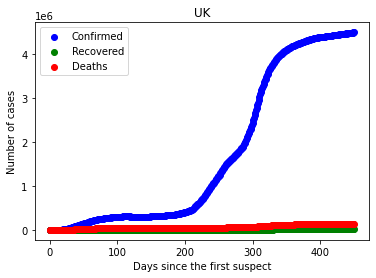

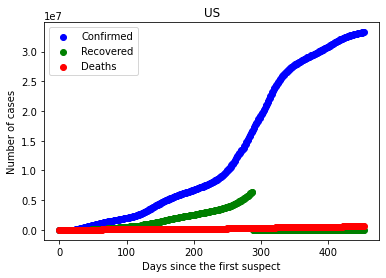

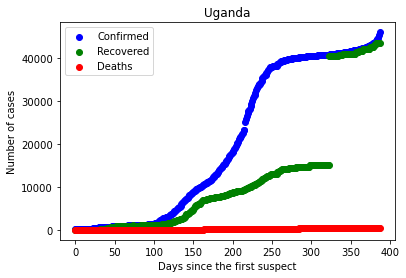

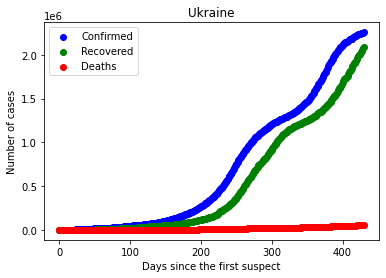

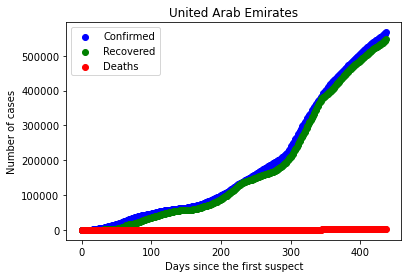

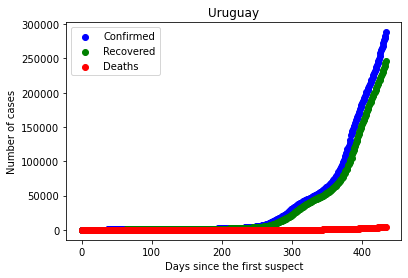

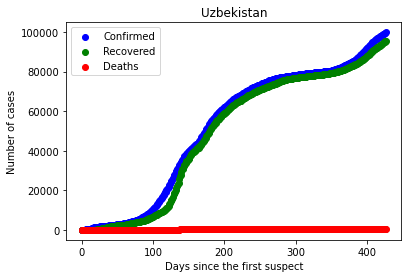

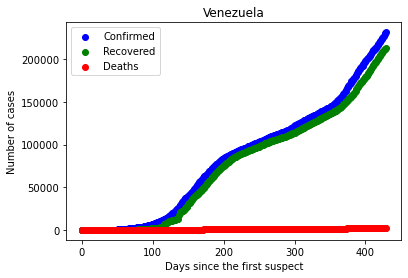

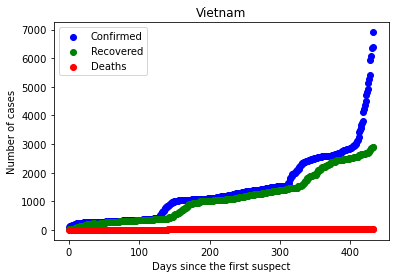

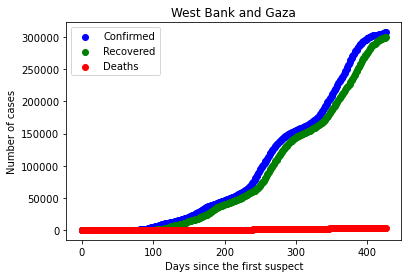

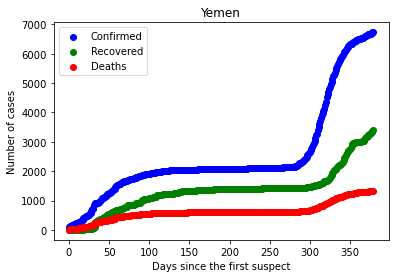

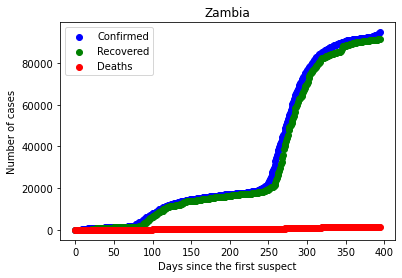

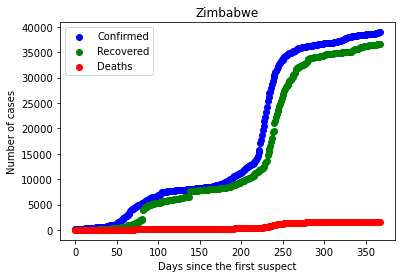

35      2020-03-28
36      2020-03-29
37      2020-03-30
38      2020-03-31
39      2020-04-01
           ...    
87269   2021-05-25
87270   2021-05-26
87271   2021-05-27
87272   2021-05-28
87273   2021-05-29
Name: Date, Length: 75055, dtype: datetime64[ns]


In [37]:
for idx in range(0,len(countries)):
    C = df3[df3['Country']==countries[idx]].reset_index()
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()
print(df3['Date'])

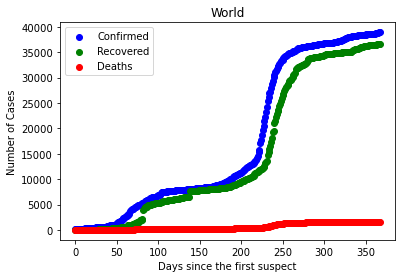

In [35]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()
c = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()